In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate

from astropy.io import fits
import astropy.units as u
from astropy.table import Table

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="17"
from sabreMod import sosf,sosfh

In [3]:
damiani_tab1_file = "Obs/J_A+A_591_A74_table1.dat.fits"
tab = Table.read(damiani_tab1_file)
tab

Id,RAdeg,DEdeg,HaNb,HaRVb,Hasigmab,HaNr,HaRVr,Hasigmar,[NII]Nb,[NII]RVb,[NII]sigmab,[NII]Nr,[NII]RVr,[NII]sigmar,HeINb,HeIRVb,HeIsigmab,HeINr,HeIRVr,HeIsigmar,[SII]1Nb,[SII]1RVb,[SII]1sigmab,[SII]1Nr,[SII]1RVr,[SII]1sigmar,[SII]2Nb,[SII]2RVb,[SII]2sigmab,[SII]2Nr,[SII]2RVr,[SII]2sigmar,Setup
,deg,deg,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,
bytes29,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes10
SKY__10434580-5930497,160.9408,-59.51381,43435.14,-23.61,15.61,58918.77,4.94,13.38,2943.68,-31.66,14.71,11672.97,2.10,10.67,15235.06,-22.16,13.79,18024.73,5.19,10.38,998.76,-32.45,12.98,3398.53,4.20,10.39,727.14,-33.94,12.95,2696.04,3.09,10.02,sky_HR15N
SKY__10445840-5933062,161.2433,-59.55172,18256.59,-31.12,13.93,34321.84,5.23,15.21,1130.41,-24.70,15.34,4429.57,5.90,15.36,5555.79,-30.83,11.55,11833.37,5.01,13.96,1655.72,-4.40,19.00,736.73,9.41,9.97,1304.64,-4.45,19.94,519.97,8.08,9.21,sky_HR15N
SKY__10445040-5935467,161.2100,-59.59631,34377.49,-28.47,13.77,65136.86,-0.09,17.20,2528.38,-22.84,13.49,3541.20,9.64,14.93,11447.99,-28.24,10.67,22875.81,0.41,14.87,1733.36,-20.27,18.14,950.03,14.14,12.06,1352.34,-19.90,18.25,642.85,13.89,11.27,sky_HR15N
SKY__10443390-5934549,161.1413,-59.58192,34307.92,-29.53,14.51,30563.08,-15.04,23.81,10198.94,-25.17,12.26,3538.75,-12.05,25.62,10756.85,-29.39,12.29,11023.40,-15.58,23.19,2687.79,-21.74,12.12,740.18,7.11,32.20,2636.84,-22.17,11.68,582.76,6.44,32.56,sky_HR15N
SKY__10451730-5942205,161.3221,-59.70569,37527.72,-28.25,15.50,22025.68,14.37,14.07,6328.36,-28.63,13.16,2644.65,15.04,12.74,9441.61,-27.95,11.69,7676.87,13.18,13.84,1748.67,-25.49,12.72,836.83,16.73,11.97,1313.25,-26.18,12.99,610.61,16.64,11.96,sky_HR15N
SKY__10451970-5945404,161.3321,-59.76122,24245.06,-21.95,15.87,9017.24,11.42,15.95,4011.71,-17.86,13.23,2122.03,-7.92,27.32,7065.39,-17.61,13.23,1828.86,14.34,8.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,sky_HR15N
SKY__10444430-5943333,161.1846,-59.72592,30519.80,-34.15,14.82,53892.78,7.00,14.64,7207.63,-33.96,12.22,5305.92,9.02,13.03,9951.92,-32.18,14.02,17619.99,7.92,12.14,2213.11,-31.97,11.54,1278.25,10.42,13.44,1662.81,-32.62,11.37,933.80,9.52,13.01,sky_HR15N
SKY__10440670-5947505,161.0279,-59.79736,8057.94,-24.88,16.14,10603.72,10.00,15.99,1587.50,-20.77,13.62,937.43,11.35,15.09,1064.69,-31.31,8.00,4338.92,5.87,17.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,sky_HR15N


In [4]:
df = tab.to_pandas()
df.describe()

,RAdeg,DEdeg,HaNb,HaRVb,Hasigmab,HaNr,HaRVr,Hasigmar,[NII]Nb,[NII]RVb,...,[SII]1sigmab,[SII]1Nr,[SII]1RVr,[SII]1sigmar,[SII]2Nb,[SII]2RVb,[SII]2sigmab,[SII]2Nr,[SII]2RVr,[SII]2sigmar
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,...,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,161.161726,-59.654315,62767.252113,-24.714007,15.885924,53873.122564,7.306363,16.018268,1631.775751,-8.739353,...,9.829619,1484.462829,9.367286,8.744284,1270.717298,-16.464157,9.631455,1203.455046,8.396328,8.680335
std,0.133125,0.080215,54846.830866,8.147913,2.757231,39423.863415,7.179267,5.690883,3522.508469,12.911389,...,6.643375,1633.447299,7.761613,6.028452,1931.147707,12.642477,6.675027,1461.860496,8.268913,6.144453
min,160.768700,-59.891890,0.000000,-51.840000,0.000000,0.000000,-25.070000,0.000000,0.000000,-44.180000,...,0.000000,0.000000,-16.630000,0.000000,0.000000,-39.300000,0.000000,0.000000,-47.760000,0.000000
25%,161.065825,-59.711945,28485.557500,-31.042500,14.320000,24528.595000,3.960000,13.850000,0.000000,-21.497500,...,0.000000,0.000000,0.000000,0.000000,0.000000,-27.327500,0.000000,0.000000,0.000000,0.000000
50%,161.155600,-59.657835,46452.860000,-26.800000,15.170000,45810.270000,7.635000,14.705000,0.000000,0.000000,...,12.010000,1135.875000,10.990000,11.110000,992.800000,-20.370000,11.700000,865.820000,9.485000,10.915000
75%,161.267100,-59.590390,76666.205000,-19.765000,16.707500,76315.320000,12.702500,16.310000,2243.900000,0.000000,...,13.950000,2091.252500,15.367500,12.155000,1706.045000,0.000000,13.857500,1642.482500,14.367500,12.087500
max,161.472400,-59.494310,483044.020000,0.000000,29.720000,372640.170000,32.650000,84.800000,44719.640000,7.920000,...,32.200000,12610.120000,54.680000,44.470000,29844.350000,2.940000,32.070000,13224.150000,61.700000,43.280000


[Text(0.5, 0, 'Velocity')]

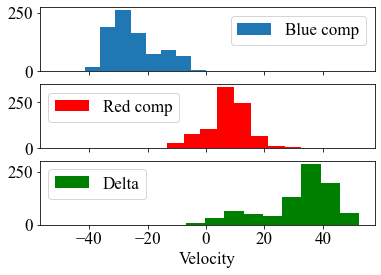

In [5]:
fig, [axb, axr, axd] = plt.subplots(3, 1, sharex=True)
axb.hist(tab["HaRVb"], label='Blue comp')
axr.hist(tab["HaRVr"], color='r', label='Red comp')
axd.hist(tab["HaRVr"] - tab["HaRVb"], color='g', label='Delta')
for ax in axb, axr, axd:
    ax.legend()
axd.set(xlabel='Velocity')

In [6]:
df = df.assign(Ha_dV=df['HaRVr'] - df['HaRVb'])
df = df.assign(Ha_close=(df['Ha_dV'] < 15.0).astype('S5') )
df = df.assign(Ha_rb_ratio=np.log10(df['HaNr']/df['HaNb']))

Blue component

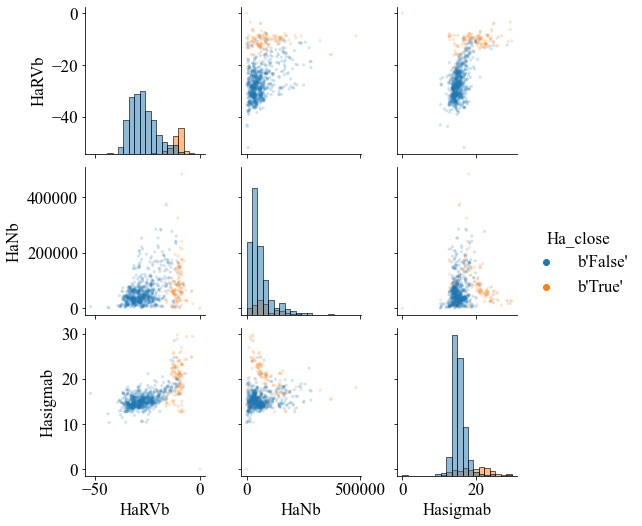

In [7]:
sns.pairplot(df, 
             vars=["HaRVb", "HaNb", "Hasigmab"], 
             diag_kind='hist', hue="Ha_close", 
             plot_kws=dict(alpha=0.2, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


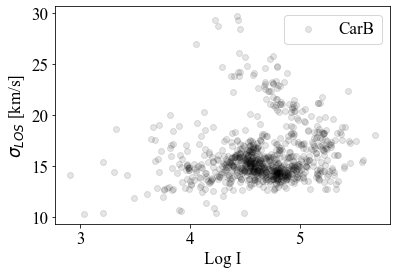

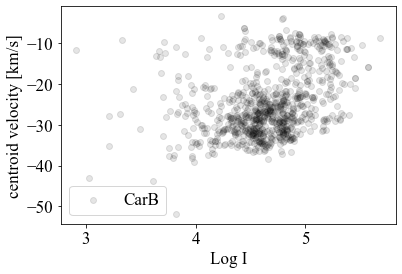

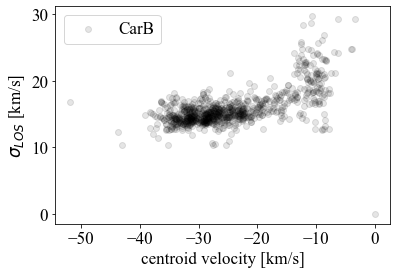

In [8]:
fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.HaRVb, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(df.HaRVb,df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaBlue.pdf', bbox_inches='tight')

Red Component

In [9]:
mask = df['Hasigmar'] > 35.0
df = df[~mask]


In [10]:
df.dropna(inplace=True)

<ipython-input-10-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


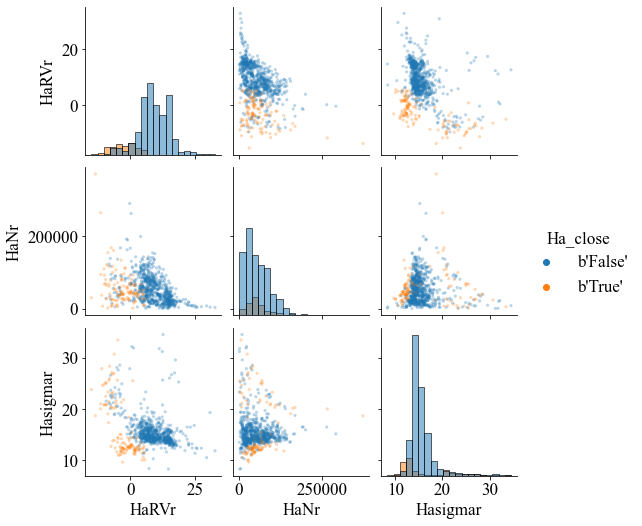

In [11]:
sns.pairplot(df, 
             vars=["HaRVr", "HaNr", "Hasigmar"], 
             diag_kind='hist', hue="Ha_close",
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

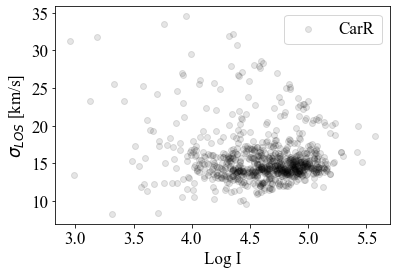

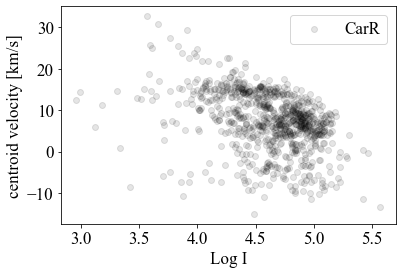

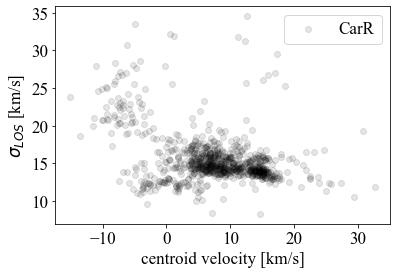

In [12]:
fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')

plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.HaRVr, alpha=0.1, color='k', label='CarR')

plt.legend()

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')

fig, ax = plt.subplots()
plt.scatter(df.HaRVr,df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaRed.pdf', bbox_inches='tight')

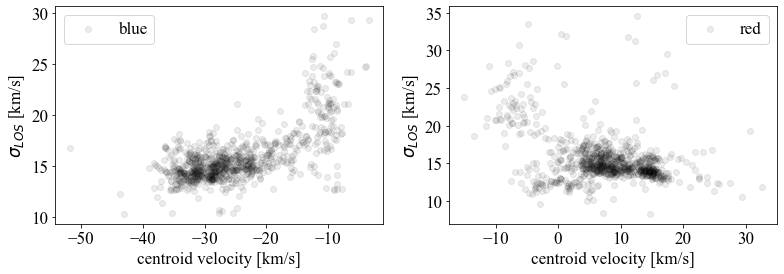

In [13]:
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.scatter(df.HaRVb,df.Hasigmab, alpha=0.075, color='k', label='blue')
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

plt.subplot(132)
plt.scatter(df.HaRVr,df.Hasigmar, alpha=0.075, color='k', label='red')
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

plt.show()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaLOSvsPOS.pdf', bbox_inches='tight')

Combining Components

In [14]:
def combine_moments(f1, v1, s1, f2, v2, s2, return_skew=False):
    """Find combined flux, mean velocity, and sigma for two components 
    with fluxes `f1` and `f2`, velocities `v1` and `v2`, and sigmas `s1` and `s2`. 
    Returns tuple of the combined moments: `f`, `v`, `s`."""
    f = f1 + f2
    v = (v1*f1 + v2*f2)/f
    ss = (s1*s1*f1 + s2*s2*f2)/f
    ss += f1*f2*(v1 - v2)**2 / f**2
    s = np.sqrt(ss)
    if return_skew:
        p1 = f1/f
        p2 = f2/f
        skew = p1*p2*(v1 - v2)*((1 - 2*p1)*(v1 - v2)**2 + 3*(s1**2 - s2**2))
        skew /= (p1*(p2*(v1 - v2)**2 + s1**2 - s2**2) + s2**2)**1.5
#        vmode = np.where(f1 > f2, v1, v2)
#        mskew = (v - vmode)/s
        return f, v, s, skew
    else:
        return f, v, s

In [15]:
fHa, vHa, sHa, gHa = combine_moments(
    df.HaNr, df.HaRVr, df.Hasigmar, 
    df.HaNb, df.HaRVb, df.Hasigmab,
    return_skew=True
)

In [16]:
dfHa = pd.DataFrame(
    {'log_F': np.log10(fHa), 
     'V_mean': vHa, 
     'sigma': sHa, 
     'skew': gHa,
     'R_B': df.Ha_rb_ratio,
     'dV': df.Ha_dV,
     'close': df.Ha_close,
     'RAdeg': df.RAdeg,
     'DEdeg': df.DEdeg,
    }
).dropna()

In [17]:
dfHa.describe()

,log_F,V_mean,sigma,skew,R_B,dV,RAdeg,DEdeg
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000
mean,4.980402,-8.830675,22.468922,-0.031035,-0.040272,32.261018,161.162622,-59.654128
std,0.302783,4.229329,2.730988,0.306038,0.436005,11.880264,0.132337,0.080008
min,3.413632,-22.703236,15.856762,-0.802990,-1.652288,-2.440000,160.768700,-59.891890
25%,4.827033,-11.433731,20.525060,-0.248047,-0.272299,28.805000,161.068450,-59.712000
50%,5.021479,-8.695479,22.423762,-0.047386,0.006337,35.580000,161.157600,-59.658080
75%,5.180976,-5.994656,24.173194,0.187720,0.248846,40.410000,161.267100,-59.589670
max,5.706532,2.921228,31.576729,0.857175,1.441905,52.510000,161.472400,-59.494310


Maps

In [18]:
points_of_interest = {
    "eta Car": [161.26517, -59.684425],
    "Tr 14": [160.98911, -59.547698],
    "WR 25": [161.0433, -59.719735],
    "Finger": [161.13133, -59.664035],
}
def mark_points(ax):
    for label, c in points_of_interest.items():
        ax.plot(c[0], c[1], marker='+', markersize='12', color='k')

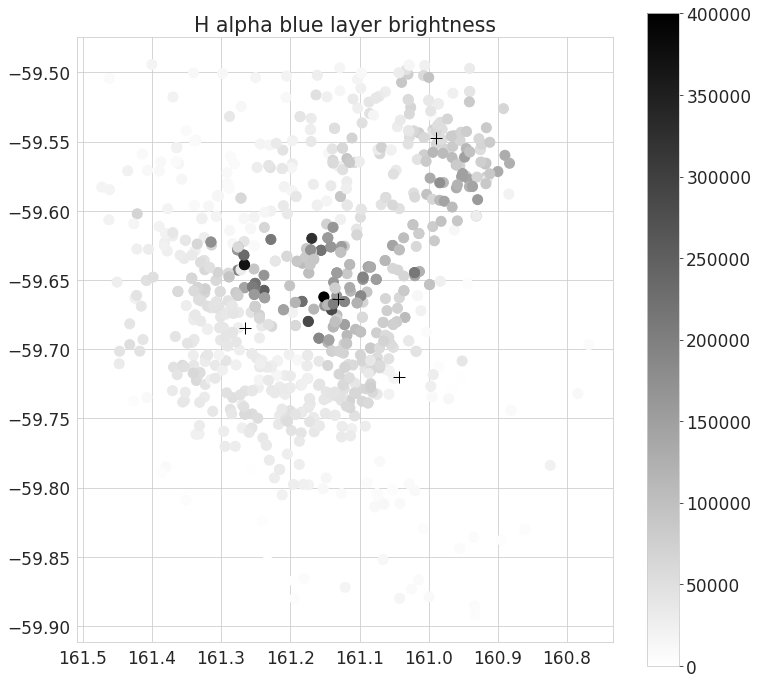

In [19]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df.HaNb, cmap='gray_r', vmin=0.0, vmax=4e5)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('H alpha blue layer brightness')

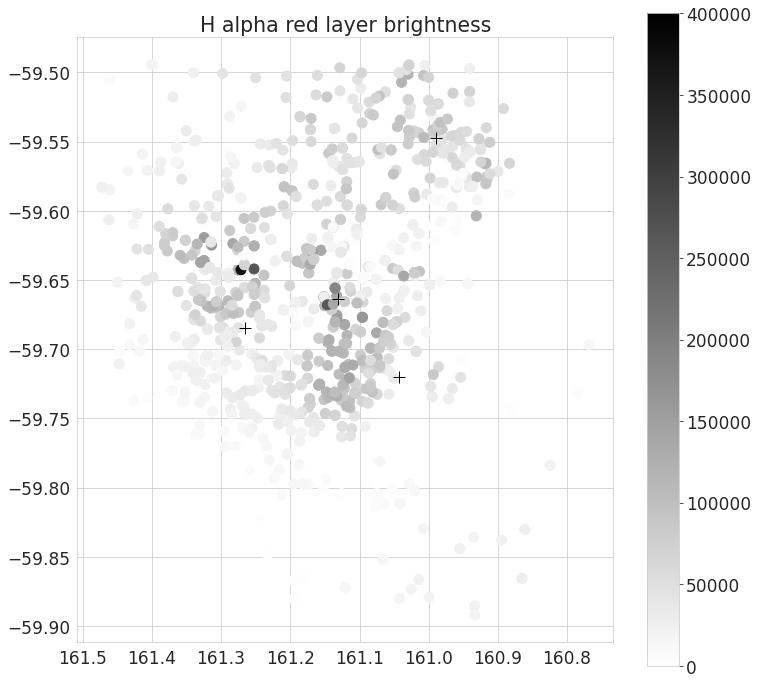

In [20]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df.HaNr, cmap='gray_r', vmin=0.0, vmax=4e5)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('H alpha red layer brightness')

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


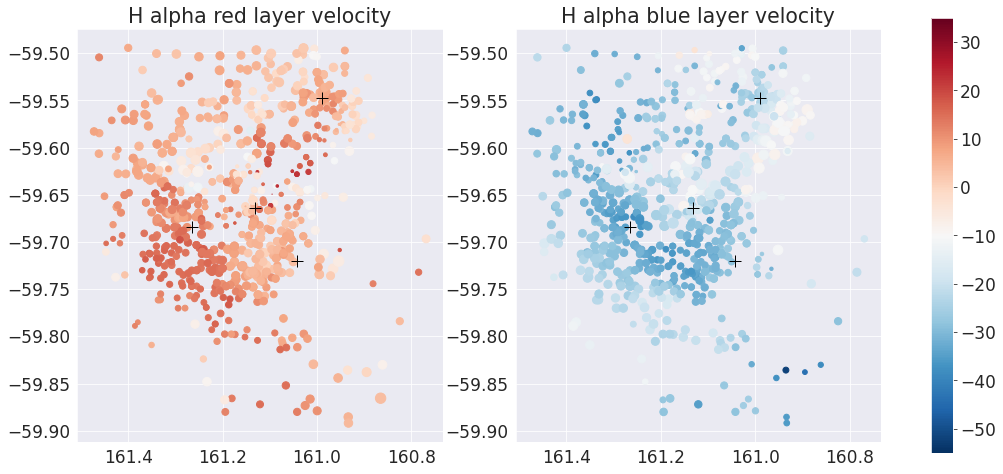

In [21]:
with sns.axes_style("darkgrid"):
    fig, [axr, axb] = plt.subplots(1, 2, figsize=(18, 8))
    scat = axr.scatter(df.RAdeg, df.DEdeg, 
                      s=40*(np.log10(df.HaNr/df.HaNb) + 1.3), 
                      c=df.HaRVr, cmap='RdBu_r',
                      vmin=-55, vmax=35, 
                     )
    scat = axb.scatter(df.RAdeg, df.DEdeg, 
                      s=40*(np.log10(df.HaNb/df.HaNr) + 1.3), 
                      c=df.HaRVb, cmap='RdBu_r',
                      vmin=-55, vmax=35,
                     )
#    scat2 = ax.scatter(df.RAdeg, df.DEdeg, 
#                      s=50*(np.log10(df.HaNr) - 3), 
#                      c=df.HaRVr, cmap='RdBu_r',
#                      vmin=-55, vmax=35, marker='+',
#                     )
    fig.colorbar(scat, ax=[axr, axb])
    mark_points(axr)
    mark_points(axb)
    axr.invert_xaxis()
    axr.set_aspect(2.0)
    axb.invert_xaxis()
    axb.set_aspect(2.0)  
    axr.set_title('H alpha red layer velocity')
    axb.set_title('H alpha blue layer velocity')

Structure Fucntion

Blue

In [22]:
df2 = df[['RAdeg', 'DEdeg', 'HaRVb']].copy()
df2.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'HaRVb' : 'RV'}, inplace = True)
df2

,X,Y,RV
0,160.9408,-59.51381,-23.61
1,161.2433,-59.55172,-31.12
2,161.2100,-59.59631,-28.47
3,161.1413,-59.58192,-29.53
4,161.3221,-59.70569,-28.25
...,...,...,...
861,160.9409,-59.55744,-9.49
862,160.9275,-59.54794,-12.91
863,160.8832,-59.56567,-9.46
864,160.9601,-59.56681,-19.62


In [23]:
pc=0.0096*3600

0.00010440306509297968


[None, None]

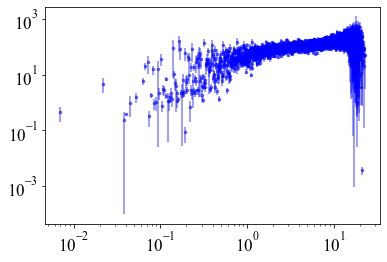

In [24]:
data=df2
SF=sosf(data)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [25]:
dfx = SF[['Lag', 'Nmqvd']].copy()
dfx=dfx.rename(columns={"Lag": "pc", "Nmqvd": "S"})
dfx.to_csv('data//CarB.csv',mode = 'w', index=False)

In [26]:
x=SF['Lag']
y=SF['Nmqvd']-(data["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:732: RuntimeWarning: The number of zeros exceeds mest
  warnings.warn(RuntimeWarning("The number of zeros exceeds mest"))


array([0.13737759, 0.14147319, 0.16271878, 0.16991796, 0.23289405,
       0.23557015, 0.31869819, 0.32316921, 0.35182439, 0.35397014])

In [27]:
s=SFr[8]

In [28]:
ss=np.round((data['RV'].std())**2,2)

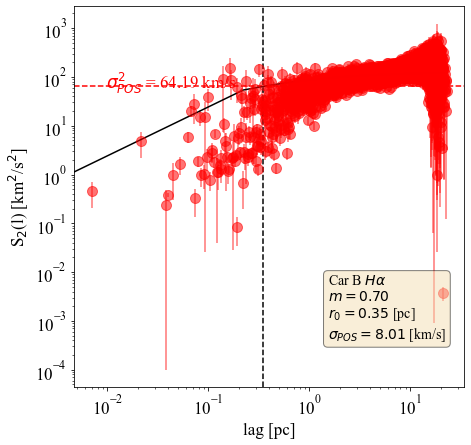

In [29]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.55, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=0.7

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('Car B ' r'$Hα$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (data["RV"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

Red

In [30]:
df3 = df[['RAdeg', 'DEdeg', 'HaRVr']].copy()
df3.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'HaRVr' : 'RV'}, inplace = True)
df3

,X,Y,RV
0,160.9408,-59.51381,4.94
1,161.2433,-59.55172,5.23
2,161.2100,-59.59631,-0.09
3,161.1413,-59.58192,-15.04
4,161.3221,-59.70569,14.37
...,...,...,...
861,160.9409,-59.55744,3.41
862,160.9275,-59.54794,-4.98
863,160.8832,-59.56567,-6.16
864,160.9601,-59.56681,4.38


0.00010440306509297968


[None, None]

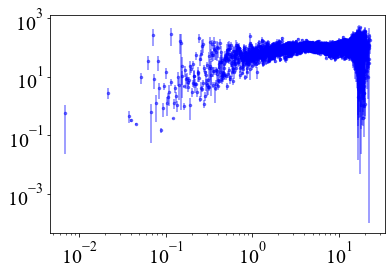

In [31]:
data=df3
SF=sosf(data)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [32]:
df = SF[['Lag', 'Nmqvd']].copy()
df=df.rename(columns={"Lag": "pc", "Nmqvd": "S"})
df.to_csv('data//CarR.csv',mode = 'w', index=False)

In [33]:
x=SF['Lag']
y=SF['Nmqvd']-(data["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:732: RuntimeWarning: The number of zeros exceeds mest
  warnings.warn(RuntimeWarning("The number of zeros exceeds mest"))


array([0.06293045, 0.05519199, 0.06761294, 0.0730335 , 0.07946344,
       0.08113711, 0.11027366, 0.11627079, 0.14449192, 0.15261821])

In [34]:
s=SFr[9]

In [35]:
ss=np.round((data['RV'].std())**2,2)

(1, 750)

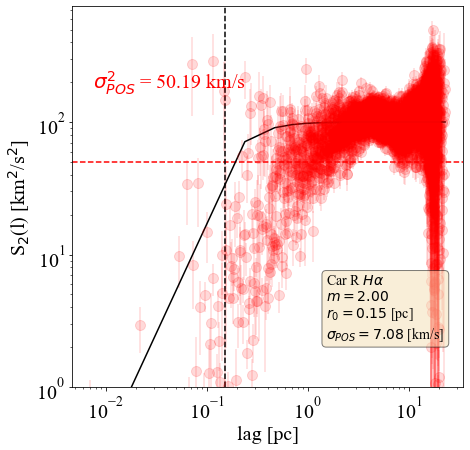

In [36]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.15, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=2

x=np.linspace((SF.Lag.min()),(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('Car R ' r'$Hα$' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (data["RV"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

Combined

In [37]:
df4 = dfHa[['RAdeg', 'DEdeg', 'V_mean']].copy()
df4.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'V_mean' : 'RV'}, inplace = True)
df4

,X,Y,RV
0,160.9408,-59.51381,-7.175543
1,161.2433,-59.55172,-7.391660
2,161.2100,-59.59631,-9.893945
3,161.1413,-59.58192,-22.703236
4,161.3221,-59.70569,-12.487097
...,...,...,...
861,160.9409,-59.55744,-6.430415
862,160.9275,-59.54794,-8.695479
863,160.8832,-59.56567,-8.319904
864,160.9601,-59.56681,-9.309055


0.00010440306509297968


[None, None]

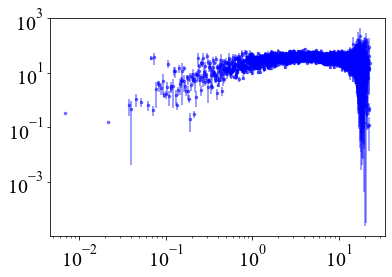

In [38]:
data=df4
SF=sosf(data)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [39]:
df = SF[['Lag', 'Nmqvd']].copy()
df=df.rename(columns={"Lag": "pc", "Nmqvd": "S"})
df.to_csv('data//CarR.csv',mode = 'w', index=False)

In [40]:
x=SF['Lag']
y=SF['Nmqvd']-(data["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:732: RuntimeWarning: The number of zeros exceeds mest
  warnings.warn(RuntimeWarning("The number of zeros exceeds mest"))


array([0.06450389, 0.06844871, 0.07265873, 0.0772568 , 0.1059467 ,
       0.10819221, 0.23163934, 0.23677141, 0.24179277, 0.24297361])

In [41]:
s=SFr[9]

In [42]:
ss=np.round((data['RV'].std())**2,2)

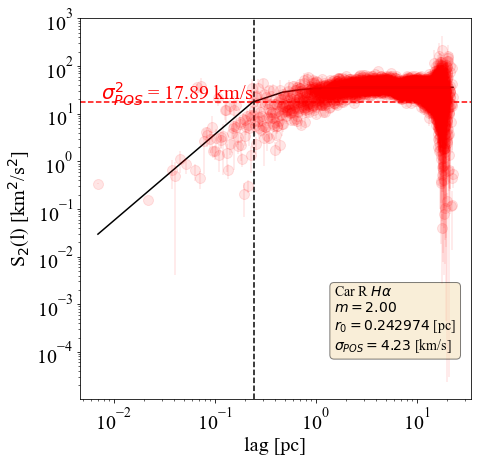

In [43]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.10, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=2

x=np.linspace((SF.Lag.min()),(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('Car R ' r'$Hα$' ,r'$m=%.2f$'%n, r'$r_{0}=%.6f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (data["RV"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [44]:
df1 = pd.DataFrame(
    {'RA': dfHa.RAdeg, 'DE': dfHa.DEdeg, 'V':vHa, '_key': 1}
)

In [45]:
df1.describe()

,RA,DE,V,_key
count,855.000000,855.000000,855.000000,855.0
mean,161.162622,-59.654128,-8.830675,1.0
std,0.132337,0.080008,4.229329,0.0
min,160.768700,-59.891890,-22.703236,1.0
25%,161.068450,-59.712000,-11.433731,1.0
50%,161.157600,-59.658080,-8.695479,1.0
75%,161.267100,-59.589670,-5.994656,1.0
max,161.472400,-59.494310,2.921228,1.0


In [46]:
df2 = df1.copy()

In [47]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

In [48]:
pairs.head()

RA        DE         V       RA_       DE_         V_
0 0  160.9408 -59.51381 -7.175543  160.9408 -59.51381  -7.175543
  1  160.9408 -59.51381 -7.175543  161.2433 -59.55172  -7.391660
  2  160.9408 -59.51381 -7.175543  161.2100 -59.59631  -9.893945
  3  160.9408 -59.51381 -7.175543  161.1413 -59.58192 -22.703236
  4  160.9408 -59.51381 -7.175543  161.3221 -59.70569 -12.487097

In [49]:
pairs.loc[:, 'dDE'] = 3600*(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = 3600*(pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [50]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]

In [51]:
pairs.head()

RA        DE         V       RA_       DE_        V_      dDE  \
0 11  160.9408 -59.51381 -7.175543  160.9254 -59.55578 -7.501601  151.092   
  25  160.9408 -59.51381 -7.175543  160.9183 -59.56622 -6.857996  188.676   
  54  160.9408 -59.51381 -7.175543  160.9254 -59.55578 -7.285478  151.092   
  55  160.9408 -59.51381 -7.175543  160.9000 -59.57164 -8.273070  208.188   
  84  160.9408 -59.51381 -7.175543  160.9233 -59.55178 -7.219278  136.692   

            dRA           s     log_s        dV       dV2   log_dV2   VV_mean  
0 11  28.108912  153.684428  2.186630  0.326058  0.106314 -0.973412 -7.338572  
  25  41.061855  193.092488  2.285765 -0.317548  0.100837 -0.996381 -7.016770  
  54  28.108912  153.684428  2.186630  0.109934  0.012086 -1.917734 -7.230511  
  55  74.452842  221.100586  2.344590  1.097527  1.204565  0.080830 -7.724307  
  84  31.943841  140.374898  2.147289  0.043734  0.001913 -2.718355 -7.197411

In [52]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,158898.000000,1.588980e+05,158898.000000,158898.000000
mean,161.248591,-59.622840,-8.379525,161.108225,-59.708101,-9.158147,306.938792,255.187624,441.770466,2.565181,0.778622,3.749540e+01,1.015622,-8.768836
std,0.111299,0.063358,4.604865,0.110135,0.073249,3.934883,243.492084,192.784289,246.221348,0.290559,6.073663,5.268445e+01,0.969969,3.020214
min,160.881100,-59.885500,-22.703236,160.768700,-59.891890,-22.703236,0.072000,0.181342,0.211978,-0.673709,-25.624463,3.801128e-11,-10.420088,-21.423836
25%,161.166700,-59.668330,-11.387402,161.042500,-59.744250,-11.434322,115.812000,99.607933,260.105192,2.415149,-3.207982,3.639902e+00,0.561090,-10.747008
50%,161.266700,-59.627640,-8.270288,161.112900,-59.711390,-8.933815,251.100000,216.469030,407.012504,2.609608,0.811212,1.690012e+01,1.227890,-8.649784
75%,161.332500,-59.570780,-4.697975,161.180400,-59.665580,-6.860020,442.800000,372.035888,583.830864,2.766287,4.898313,4.947631e+01,1.694397,-6.669889
max,161.472400,-59.494310,2.921228,161.462100,-59.494720,2.921228,1431.288000,1280.427149,1693.387954,3.228756,24.786356,6.566131e+02,2.817310,2.753221


In [53]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000,-0.136218,-0.052246,0.541279,-0.070135,-0.073629,-0.051646,0.487405,0.210137,0.256414,0.008091,0.001988,0.024227,-0.087793
DE,-0.136218,1.000000,0.366337,-0.115339,0.517674,-0.057634,0.376107,-0.021139,0.298798,0.272785,0.315084,0.055200,0.038820,0.241729
V,-0.052246,0.366337,1.000000,-0.042431,0.189289,-0.005555,0.138166,-0.010092,0.111017,0.100342,0.761768,0.020336,0.030486,0.758722
RA_,0.541279,-0.115339,-0.042431,1.000000,0.009630,-0.123324,-0.118472,-0.470377,-0.366669,-0.304182,0.047727,0.009330,0.007170,-0.112683
DE_,-0.070135,0.517674,0.189289,0.009630,1.000000,-0.190897,-0.598057,-0.081269,-0.494197,-0.416883,0.267187,0.004047,-0.003958,0.019947
V_,-0.073629,-0.057634,-0.005555,-0.123324,-0.190897,1.000000,0.152750,0.050311,0.140137,0.092177,-0.652071,-0.199292,-0.129117,0.647190
dDE,-0.051646,0.376107,0.138166,-0.118472,-0.598057,0.152750,1.000000,0.068211,0.815102,0.707005,0.005792,0.047325,0.040650,0.204835
dRA,0.487405,-0.021139,-0.010092,-0.470377,-0.081269,0.050311,0.068211,1.000000,0.600946,0.584789,-0.040246,-0.007667,0.017929,0.025080
s,0.210137,0.298798,0.111017,-0.366669,-0.494197,0.140137,0.815102,0.600946,1.000000,0.907523,-0.006619,0.030599,0.042292,0.175921
log_s,0.256414,0.272785,0.100342,-0.304182,-0.416883,0.092177,0.707005,0.584789,0.907523,1.000000,0.016358,0.056716,0.074534,0.136541


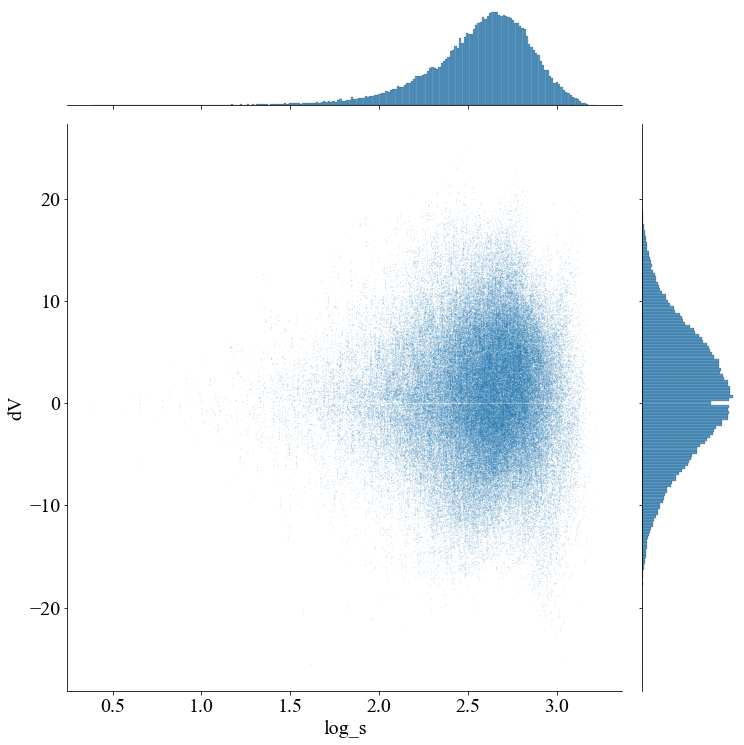

In [54]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=1, edgecolor='none')
ax.fig.set_size_inches(12, 12)

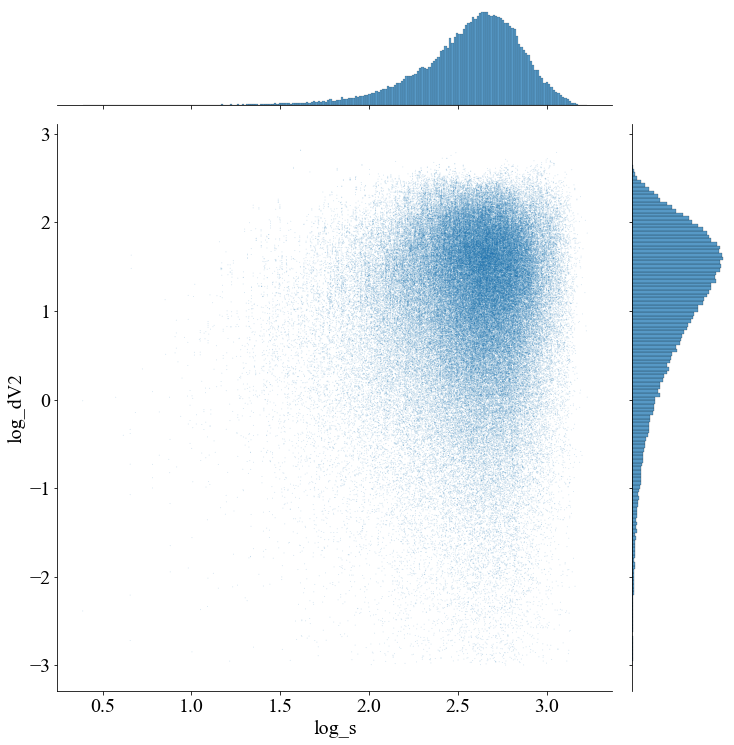

In [55]:
mask = (pairs.log_s > 0.0) & (pairs.log_dV2 > -3)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=1, edgecolor='none')
ax.fig.set_size_inches(12, 12)

In [56]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)

In [57]:
pairs.s_class[pairs.s_class == 0] = 1

In [58]:
for j in range(7):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
             dV2      log_s
count  16.000000  16.000000
mean    5.014731   0.470543
std    12.520602   0.411279
min     0.001895  -0.673709
25%     0.160473   0.526791
50%     0.403821   0.654966
75%     0.991150   0.656446
max    42.751875   0.723970

s_class = 2
              dV2       log_s
count  176.000000  176.000000
mean     7.298944    1.091564
std     10.736813    0.116531
min      0.000581    0.780460
25%      0.372031    1.015461
50%      2.863256    1.104573
75%      8.194566    1.194617
max     60.571379    1.239472

s_class = 3
                dV2        log_s
count  2.227000e+03  2227.000000
mean   1.561455e+01     1.583505
std    3.483521e+01     0.128390
min    5.390344e-07     1.250376
25%    9.648245e-01     1.490021
50%    4.552383e+00     1.612689
75%    1.580428e+01     1.694222


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


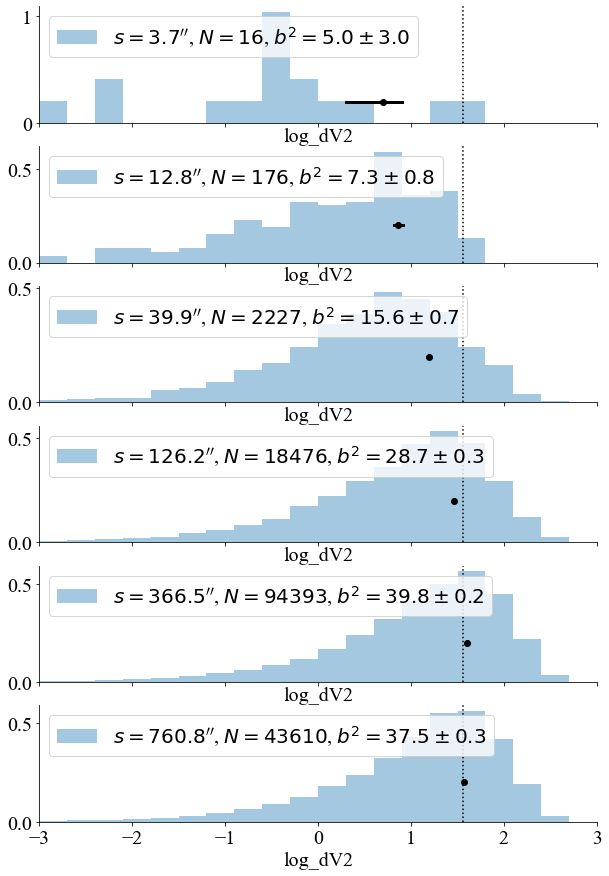

In [59]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(6, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 7), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20, hist_kws=dict(range=[-3.0, 3.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-3.0, 3.0])
    ax.legend(loc='upper left')
sns.despine()

In [60]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 35.73


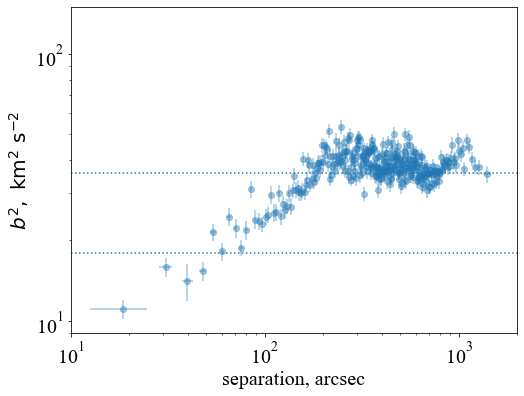

In [61]:
ngroup = 500
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
#ax.plot(s, b2, 'o')
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4)
ax.set(xscale='log', yscale='log', 
       xlim=[10.0, 2000.0], ylim=[9.0, 150.0],
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

[None,
 Text(0, 0.5, '$b^2,\\ \\mathrm{km^2\\ s^{-2}}$'),
 None,
 Text(0.5, 0, 'separation, pc')]

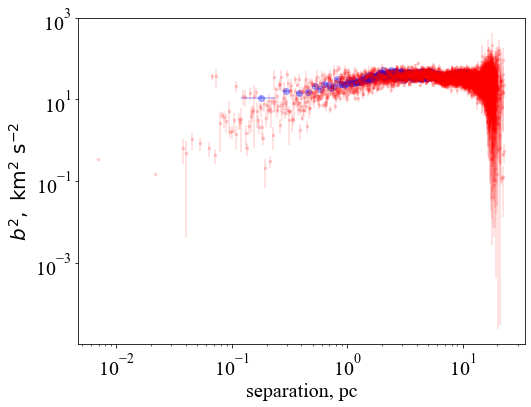

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s*0.0096, b2, yerr=e_b2, xerr=e_s*0.0096, fmt='o', alpha=0.3,color="blue")

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.15, markersize=5)

ax.set(xscale='log', yscale='log', 
       xlabel='separation, pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )

In [63]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 92.39762330055237 seconds ---
